# Word Cloud Amazon Kindle Comments
Este notebook genera una nube de palabras clave a partir de los comentarios hechos por los usuarios de Amazon Kindle, para análisis de sentimientos. El dataset utilizado en este notebook se encuentra disponible en https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis. La imagen utilizada para la máscara está disponible en https://pixabay.com/es/photos/computadora-port%c3%a1til-nota-vac%c3%ado-5255270/

### 1) Creamos nuestro primer wordcloud (v1)

In [1]:
#Importamos las librerias para crear nubes de palabras
import os
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

In [2]:
#Importamos el dataset de comentarios
data_file = pd.read_csv('preprocessed_kindle_review.csv')

#Visualizamos las cabeceras del dataset
data_file.head()

Unnamed: 0  rating                                         reviewText  \
0           0       5  This book was the very first bookmobile book I...   
1           1       1  When I read the description for this book, I c...   
2           2       5  I just had to edit this review. This book is a...   
3           3       5  I don't normally buy 'mystery' novels because ...   
4           4       5  This isn't the kind of book I normally read, a...   

                           summary  
0                50 + years ago...  
1          Boring! Boring! Boring!  
2  Wiggleliscious/new toy ready/!!  
3                  Very good read.  
4                     Great Story!

In [3]:
#Obtenemos la información del dataset
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12000 non-null  int64 
 1   rating      12000 non-null  int64 
 2   reviewText  12000 non-null  object
 3   summary     12000 non-null  object
dtypes: int64(2), object(2)
memory usage: 375.1+ KB


In [4]:
#Importamos las palabras no deseadas para la nube
stopwords_en = set(stopwords.words('english'))

In [5]:
#Configuramos la nube de palabras
key_reviews = WordCloud(
    background_color="white",
    max_words=200,    
    stopwords=stopwords_en,    
    max_font_size=120,
    random_state=42,           
)

#Generamos la nube de palabras
key_reviews.generate(''.join(data_file['reviewText']))

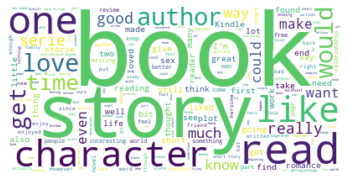

In [6]:
#Graficamos la nube de palabras generada
plt.figure()
plt.imshow(key_reviews, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2) Ahora mejoraremos nuestro wordcloud (v2)

In [7]:
#Combinamos las columnas reviewText y summary
data_file['reviews'] = data_file.reviewText.str.cat(data_file.summary, sep=' ')

#Visualizamos las cabeceras del dataset
data_file.head()

Unnamed: 0  rating                                         reviewText  \
0           0       5  This book was the very first bookmobile book I...   
1           1       1  When I read the description for this book, I c...   
2           2       5  I just had to edit this review. This book is a...   
3           3       5  I don't normally buy 'mystery' novels because ...   
4           4       5  This isn't the kind of book I normally read, a...   

                           summary  \
0                50 + years ago...   
1          Boring! Boring! Boring!   
2  Wiggleliscious/new toy ready/!!   
3                  Very good read.   
4                     Great Story!   

                                             reviews  
0  This book was the very first bookmobile book I...  
1  When I read the description for this book, I c...  
2  I just had to edit this review. This book is a...  
3  I don't normally buy 'mystery' novels because ...  
4  This isn't the kind of book I normally read, a...

In [8]:
#Agregamos mas palabras a excluir en el wordcloud
new_stopwords = ['book','character','read']
stopwords_en.update(new_stopwords)

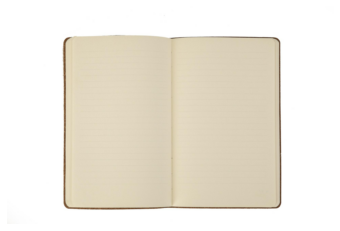

In [9]:
#Importaremos una imagen para crear una máscara para el wordcloud
mask_img = np.array(Image.open("notebook.jpg"))

#Mostramos la imagen importada
plt.figure()
plt.imshow(mask_img, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#Configuramos nuevamente la nube de palabras
key_reviews = WordCloud(
    background_color="white",
    max_words=200,
    mask=mask_img,
    stopwords=stopwords_en,    
    max_font_size=120,
    random_state=42,           
)

#Generamos la nube de palabras
key_reviews.generate(''.join(data_file['reviews']))

#Creamos el mapa de colores de la imagen
image_colors = ImageColorGenerator(mask_img)

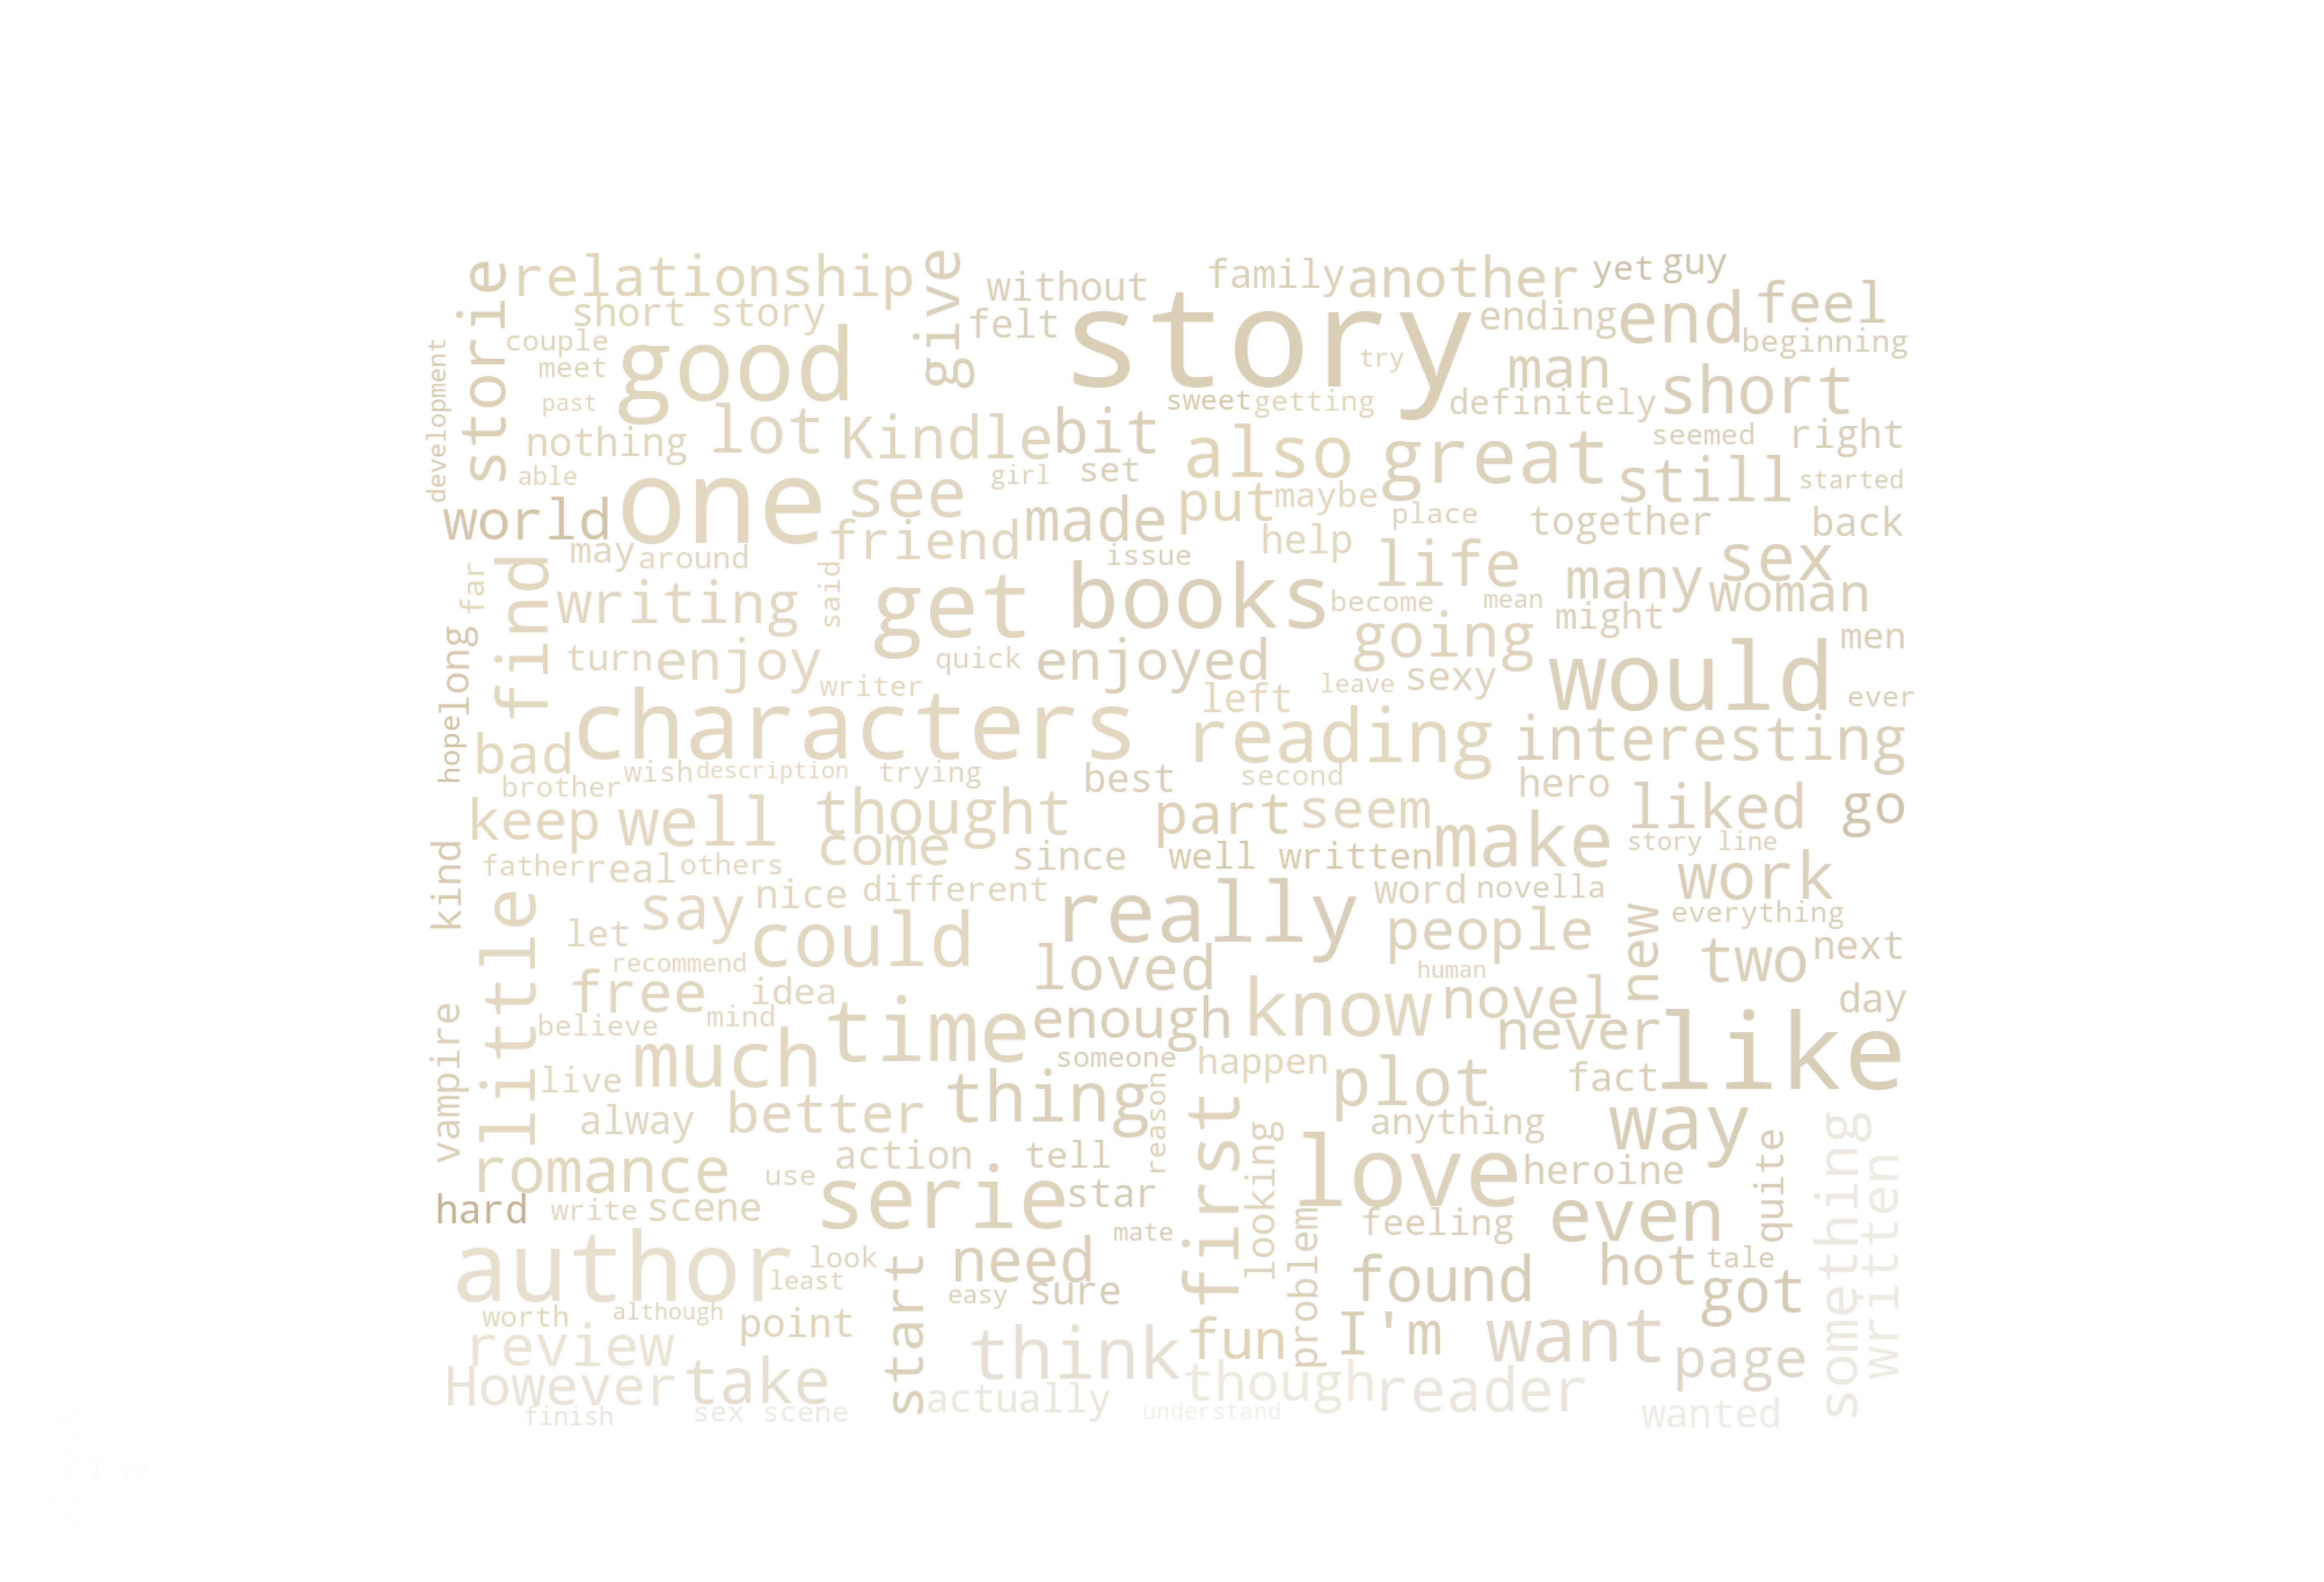

In [11]:
#Graficamos la nueva nube obtenida
plt.figure(dpi=1200)
plt.imshow(key_reviews.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

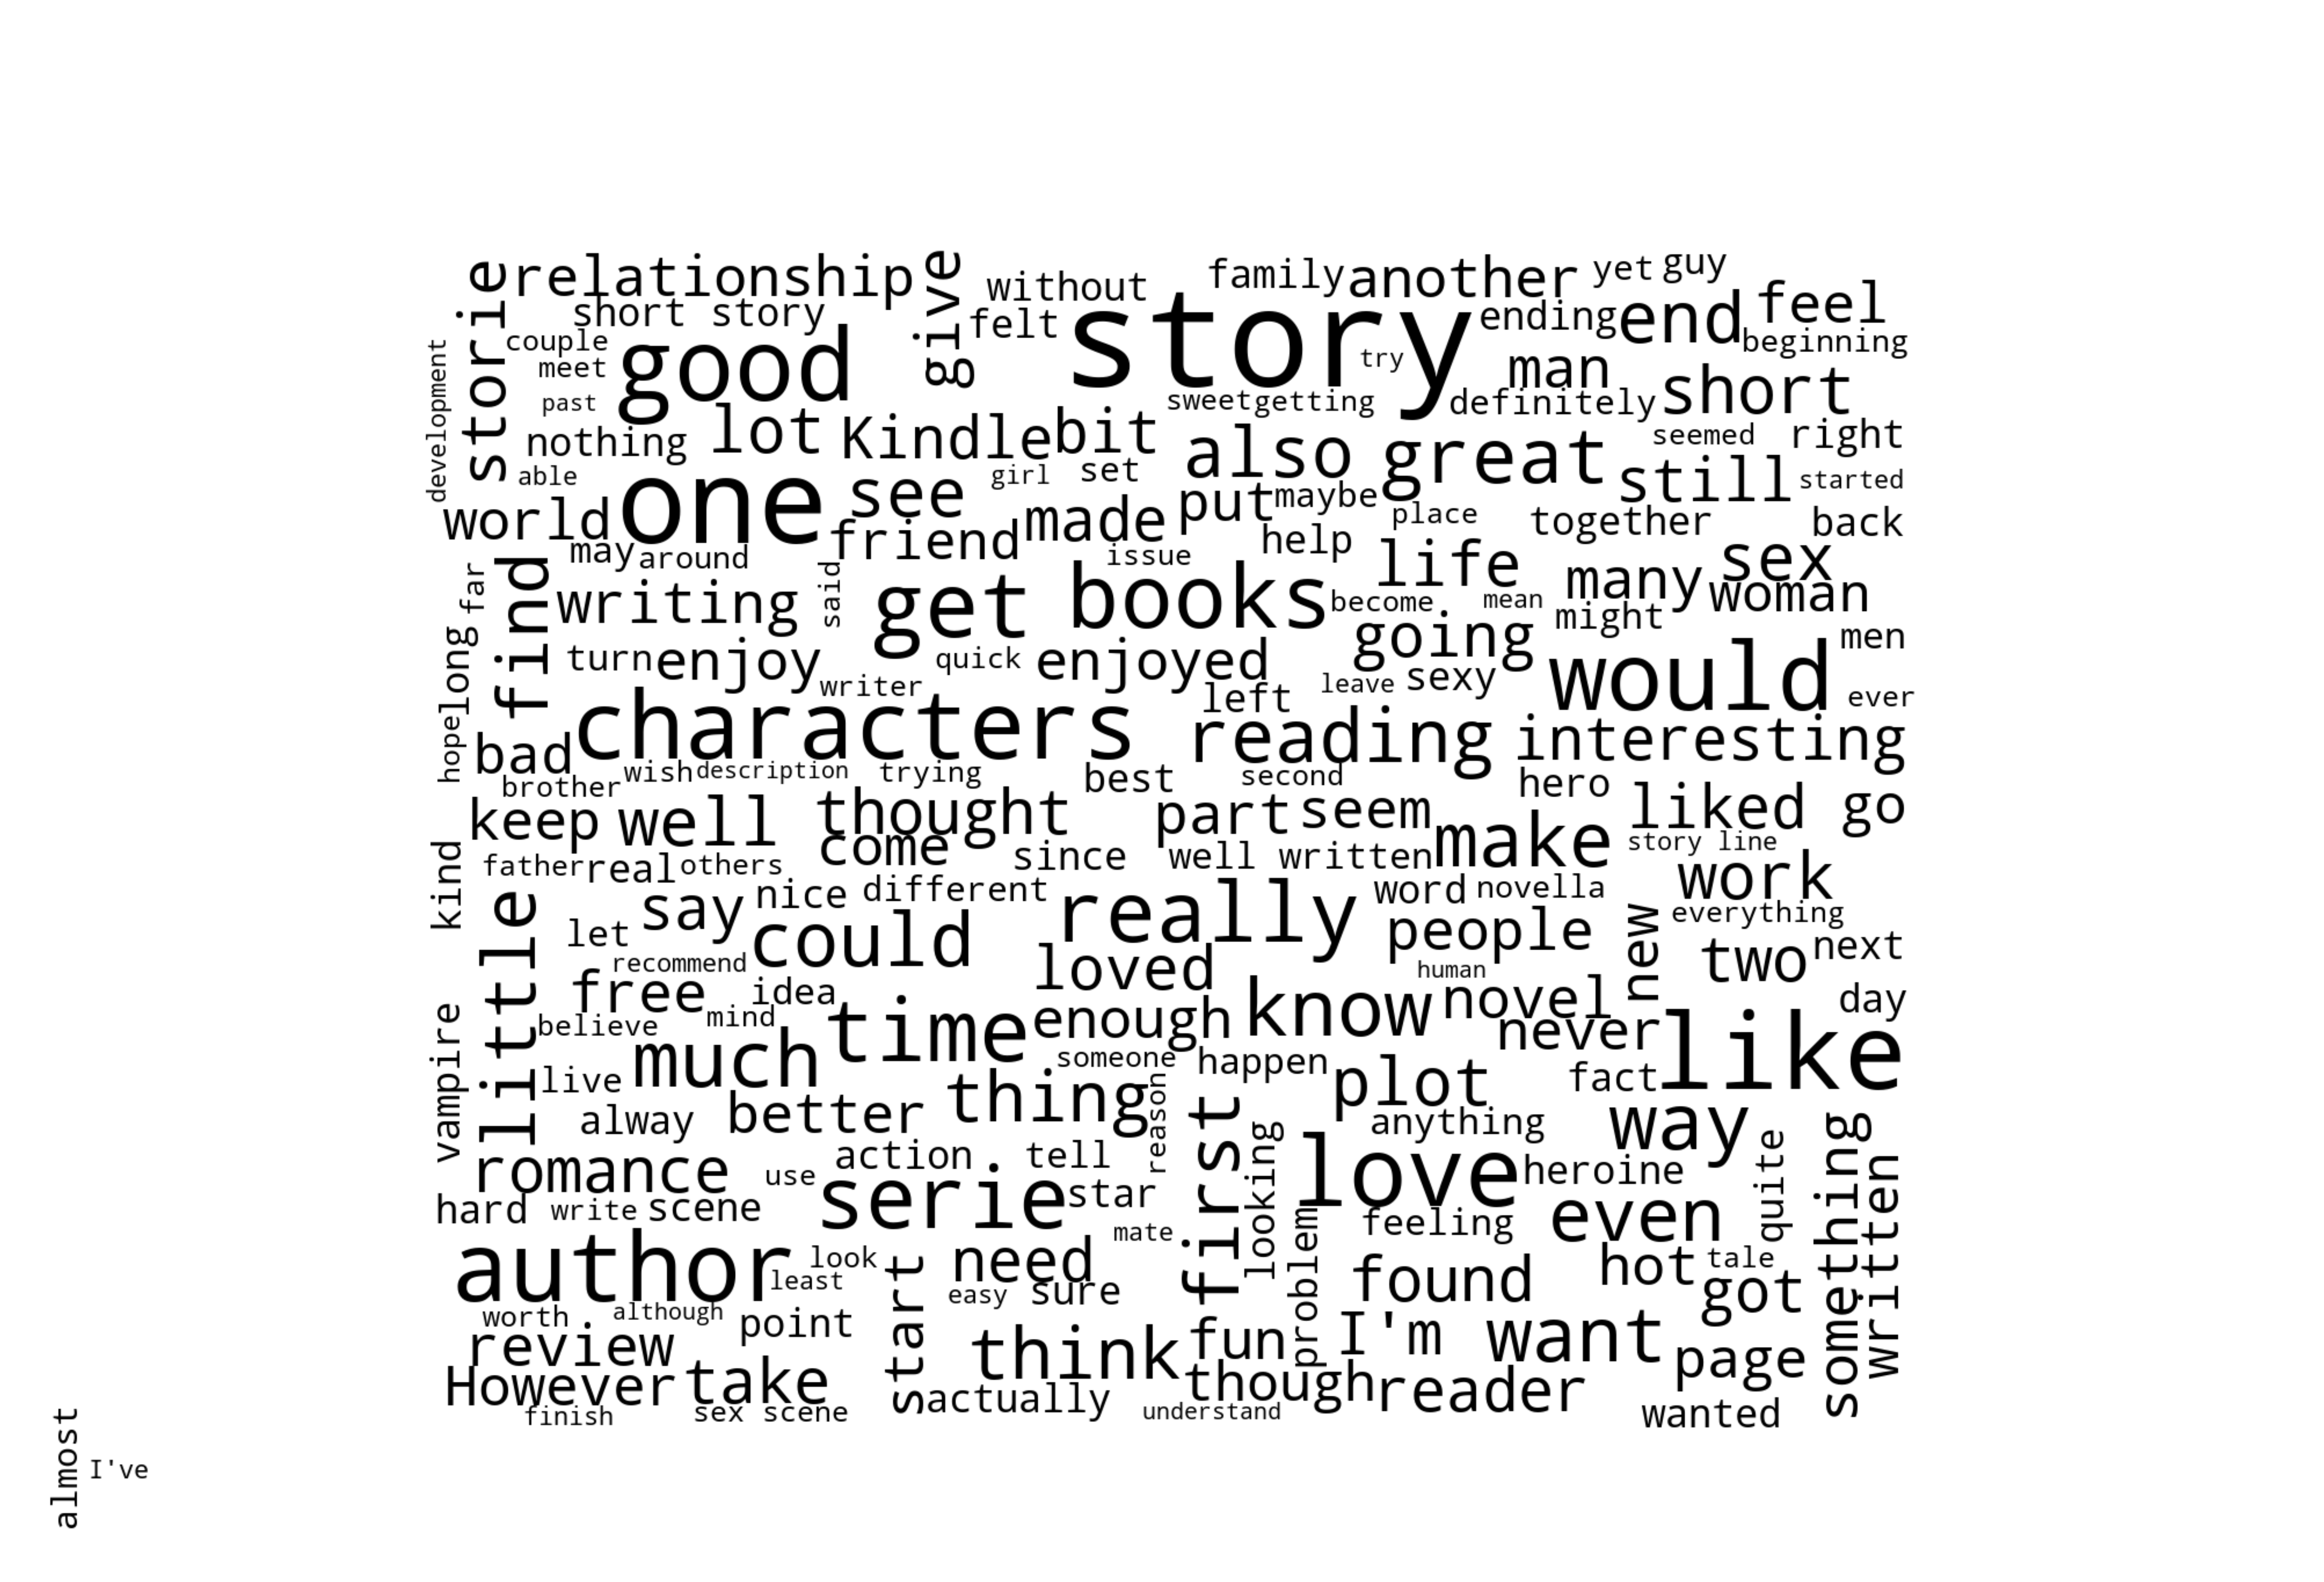

In [12]:
#Graficamos la nueva nube en blanco y negro
plt.figure(dpi=1200)
plt.imshow(key_reviews.recolor(color_func=lambda *args, **kwargs: (0,0,0)), interpolation='bilinear')
plt.axis('off')
plt.show()